In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [4]:
data = pd.read_csv('features.csv')

In [5]:
data.head(10)

,AIRLINE_CODE,ORIGIN,DEST,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,Month,Day
0,UA,FLL,EWR,-4.0,19.0,4.0,-14.0,176.0,153.0,1065.0,1,9
1,DL,MSP,SEA,-6.0,9.0,38.0,-5.0,236.0,189.0,1399.0,11,19
2,UA,DEN,MSP,6.0,20.0,5.0,0.0,112.0,87.0,680.0,7,22
3,DL,MSP,SFO,-1.0,27.0,9.0,24.0,285.0,249.0,1589.0,3,6
4,NK,MCO,DFW,-2.0,15.0,14.0,-1.0,182.0,153.0,985.0,2,23
5,WN,DAL,OKC,147.0,15.0,3.0,141.0,54.0,36.0,181.0,7,31
6,AA,DCA,BOS,-9.0,23.0,8.0,-29.0,89.0,58.0,399.0,6,11
7,YX,HSV,DCA,-6.0,22.0,41.0,23.0,151.0,88.0,613.0,7,8
8,NK,IAH,LAX,-3.0,11.0,8.0,-11.0,219.0,200.0,1379.0,2,12
9,AS,SEA,FAI,-9.0,19.0,3.0,1.0,220.0,198.0,1533.0,8,22


In [39]:
features = ['ORIGIN', 'DEST', 'AIRLINE_CODE']
X = data[features].copy()
y = data['ARR_DELAY']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define preprocessing pipeline for categorical features only
preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Transform categorical features
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

model = LinearRegression()
model.fit(X_train_processed, y_train)

joblib.dump(model, 'flight_delay_predictor.pkl')

['flight_delay_predictor.pkl']

In [43]:
input_data = {
    'ORIGIN': ['DAL'],  
    'DEST': ['OKC'],
    'AIRLINE_CODE': ['WN']
}  
input_df = pd.DataFrame(input_data)

# Transform
input_df_processed = preprocessor.transform(input_df)
predicted_arr_delay = model.predict(input_df_processed)

print(f'Predicted Arrival Delay: {predicted_arr_delay[0]} minutes')

Predicted Arrival Delay: 7.025980754884812 minutes


In [50]:
y_pred = model.predict(X_test_processed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 23.90340411963094
MSE: 2582.8484885604503
R2: 0.0066720468743060035


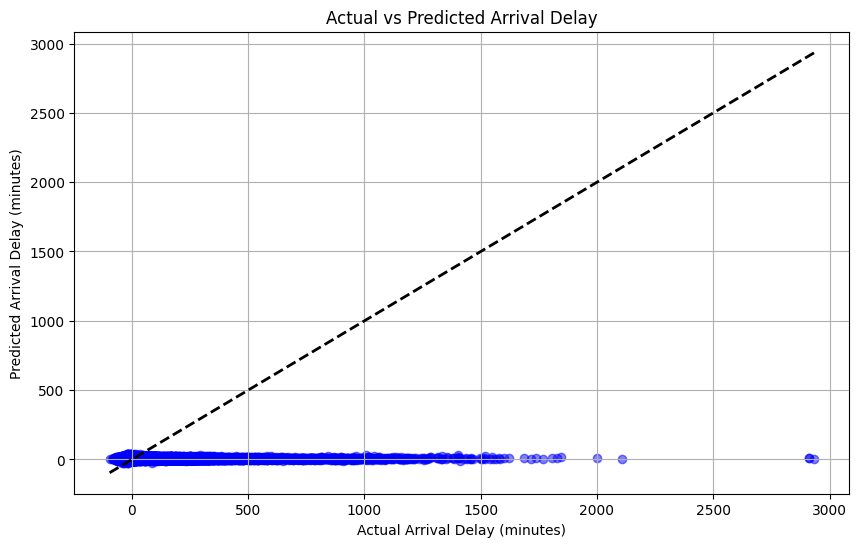

In [47]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Arrival Delay (minutes)')
plt.title('Actual vs Predicted Arrival Delay')
plt.grid(True)
plt.show()

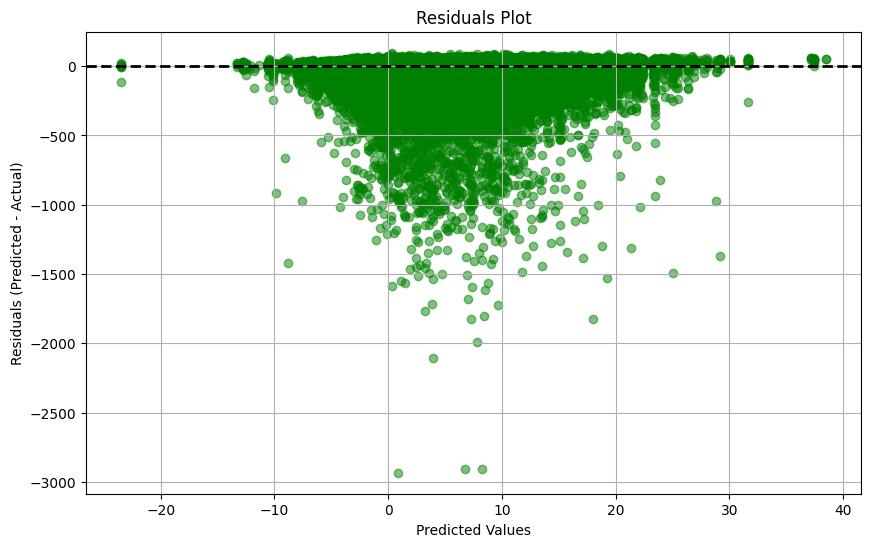

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test, color='green', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Predicted - Actual)')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()